In [1]:
from bs4 import BeautifulSoup
import urllib.request 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [2]:
response = urllib.request.urlopen('http://php.net/') # open a web
html = response.read() # read this web
soup = BeautifulSoup(html, "html5lib") # 结果包含许多需要清理的HTML标签。然后BeautifulSoup模块来清洗这样的文字
text = soup.get_text(strip = True) 
tokens = [t for t in text.split()] #将文本转换为tokens
clean_tokens = list()
sr = stopwords.words('english') # 清除无效的停用词
for token in tokens:
    if not token in sr:
        clean_tokens.append(token)
freq = nltk.FreqDist(clean_tokens) # 使用Python NLTK统计token的频率分布
for key, val in freq.items():
    print(str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesPredefined:1
AttributesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

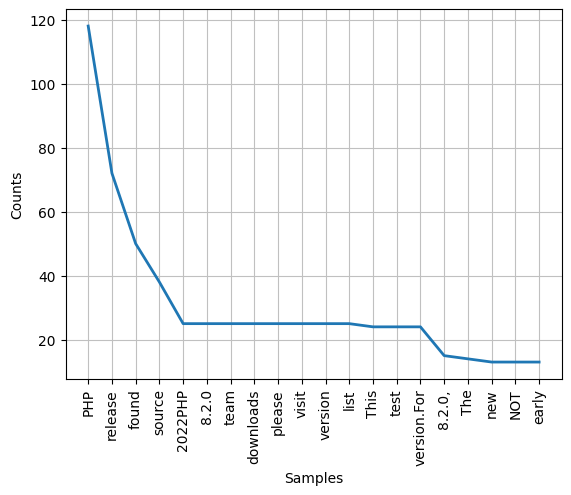

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
freq.plot(20, cumulative=False) # 可以调用plot函数做出频率分布图

In [4]:
# 使用句子tokenizer将文本tokenize成句子:
# Mr.这个词没有被分开
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day,"
print (sent_tokenize(mytext))
print (word_tokenize(mytext))

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day,']
['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',']


In [5]:
# 同义词处理
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [6]:
# 使用WordNet来获取同义词:
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


In [7]:
# 反义词处理:
antonyms = []
for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['large', 'big', 'big']


In [8]:
#词干提取
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('working'))
print(stemmer)

work
<PorterStemmer>


In [9]:
# 非英文词干提取
from nltk.stem import SnowballStemmer

print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [10]:
from nltk.stem import SnowballStemmer

french_stemmer = SnowballStemmer('french')
print(french_stemmer.stem("French word"))

french word


In [11]:
# 单词变体还原
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('increases'))

increas


In [14]:
# 用NLTK的WordNet来对同一个单词进行变体还原，才是正确的结果:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('increases'))

increase


In [1]:
# 结果还可以是动词(v)、名词(n)、形容词(a)或副词(r)：
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('playing', pos="n"))
print(lemmatizer.lemmatize('playing', pos="a"))
print(lemmatizer.lemmatize('playing', pos="r"))

play
playing
playing
playing


In [2]:
# 词干提取不会考虑语境，这也是为什么词干提取比变体还原快且准确度低的原因。
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
print(stemmer.stem('stones'))
print(stemmer.stem('speaking'))
print(stemmer.stem('bedroom'))
print(stemmer.stem('jokes'))
print(stemmer.stem('lisa'))
print(stemmer.stem('purple'))
print('----------------------')
print(lemmatizer.lemmatize('stones'))
print(lemmatizer.lemmatize('speaking'))
print(lemmatizer.lemmatize('bedroom'))
print(lemmatizer.lemmatize('jokes'))
print(lemmatizer.lemmatize('lisa'))
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple
